In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: The Invariant Mass Distribution

In [2]:
# loading in the data
data = np.genfromtxt('atlas_z_to_ll.csv', delimiter = ',', skip_header = 1)

In [3]:
pt1 = data[:,0]
pt2 = data[:,1]
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]

In [4]:
# finding the momentum and mass 
px1 = pt1*np.cos(phi1)
px2 = pt2*np.cos(phi2)
px = px1 + px2

py1 = pt1*np.sin(phi1)
py2 = pt2*np.sin(phi2)
py = py1 + py2

pz1 = pt1*np.sinh(eta1)
pz2 = pt2*np.sinh(eta2)
pz = pz1 + pz2

In [5]:
M = np.sqrt((E1+E2)**2 - (px**2 + py**2 + pz**2)) 
print(f'mass = {M} GeV')

mass = [92.1500371  89.28245012 88.2747245  ... 89.49674175 67.40937294
 90.84796693] GeV


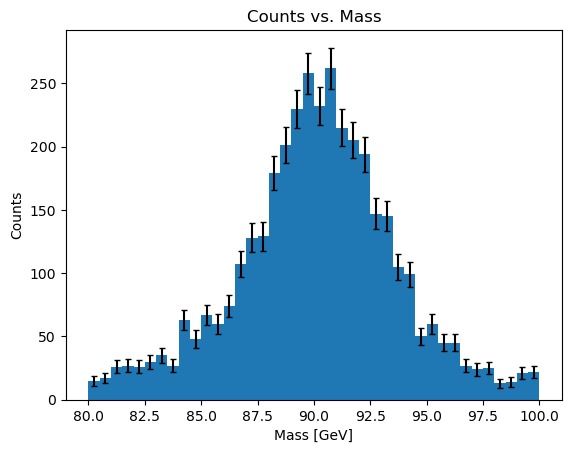

In [6]:
# making the histogram 
fig,ax = plt.subplots(1,1)
bins = np.linspace(80,100,41)

counts, bins, patches = ax.hist(M, bins = bins)
bin_edge = bins[0:-1]
bin_center = (bin_edge[1] - bin_edge[0])/2
bin_data = bin_edge + bin_center

sigma = np.sqrt(counts)
ax.errorbar(bin_data, counts, yerr = sigma, ls = '', capsize = 2.5, color = 'black')
ax.set_xlabel('Mass [GeV]')
ax.set_ylabel('Counts')
ax.set_title('Counts vs. Mass')
fig.savefig('Counts vs. Mass.png')

## Part 2: Breit-Wigner Fit

In [7]:
# coding the distribution of decay function 
def decay_fit(m,m0,gamma):
    D = (1/np.pi)*((gamma/2)/((m-m0)**2 + (gamma/2)**2))
    return (5000/2)*D

# fitting the mass-distrubtion - need to fit for m0 and gamma 
from scipy.optimize import curve_fit 

# mask is picking a specific segment of the data
mask = (bin_data > 87) & (bin_data < 93)
mask_bin_data = bin_data[mask]
mask_counts = counts[mask]
mask_sigma = sigma[mask]

params, covar = curve_fit(f = decay_fit, xdata = mask_bin_data, ydata = mask_counts, sigma = mask_sigma, absolute_sigma = True)

m0_fit = params[0]
gamma_fit = params[1]
print(f'm0 fit = {m0_fit} in GeV')
print(f'gamma fit = {gamma_fit} in GeV')

m0 fit = 90.34080586020902 in GeV
gamma fit = 6.3909983856627735 in GeV


Chi-squared = 9.985097164263774
Reduced Chi-squared = 0.9985097164263774
P-value = 0.4418017385627231
m0 = 90.34080586020902 +- 0.09351482703525671


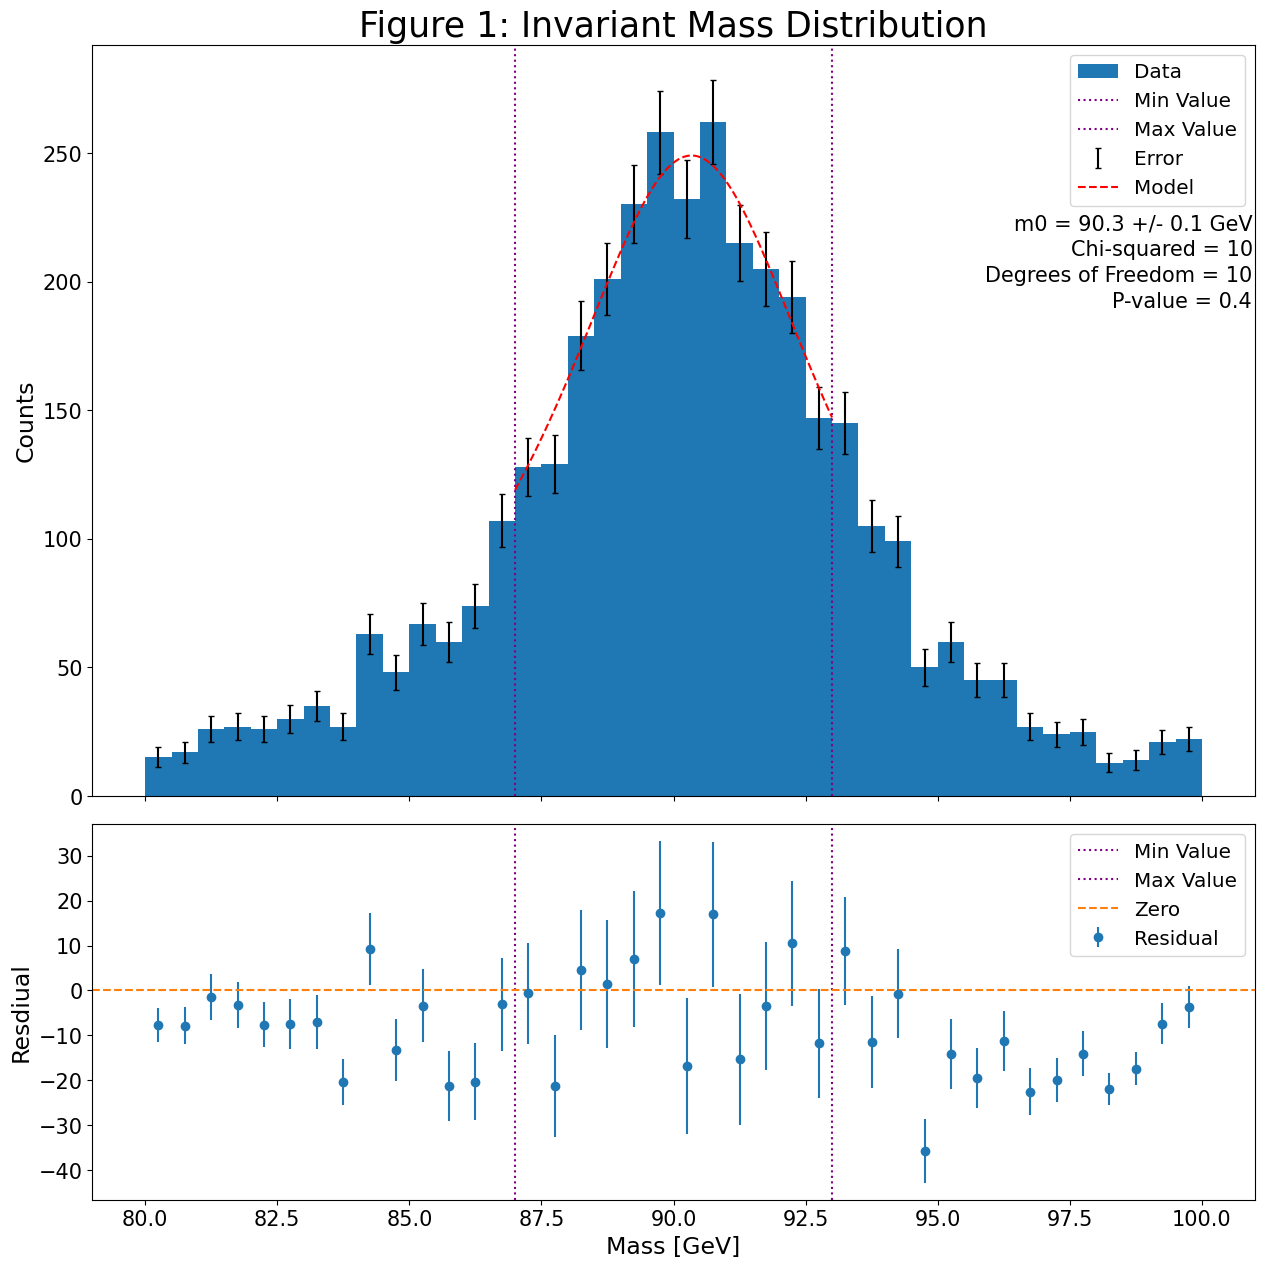

In [8]:
# finding the fit line
M_fit = np.linspace(87,93, 100)
fit = decay_fit(M_fit, m0_fit, gamma_fit)

# new plot of data (with error bars) and the fit overlaid

fig, (ax_top, ax_bot) = plt.subplots(2,1, sharex = True, figsize = (15,15), gridspec_kw = {'height_ratios':[3,1.5], 'hspace' : 0.05})

counts, bins, patches = ax_top.hist(M, bins = bins, label = 'Data')
bin_edge = bins[0:-1]
bin_center = (bin_edge[1] - bin_edge[0])/2
bin_data = bin_edge + bin_center

sigma = np.sqrt(counts)
ax_top.errorbar(bin_data, counts, yerr = sigma, ls = '', label = 'Error', capsize = 2.5, color = 'black')
ax_top.errorbar(M_fit, fit, label = 'Model', ls = '--', color = 'red')
ax_top.set_ylabel('Counts', fontsize = 17)
ax_top.set_title('Figure 1: Invariant Mass Distribution', fontsize = 25)
ax_top.axvline(87, 0, 300, color = 'purple', ls = 'dotted', label = 'Min Value')
ax_top.axvline(93, 0, 300, color = 'purple', ls = 'dotted', label = 'Max Value')
ax_top.tick_params(labelsize = 15)
ax_top.legend(fontsize = 'x-large')

# finding residuals
residuals = (counts - decay_fit(bin_data, m0_fit, gamma_fit))
ax_bot.errorbar(bin_data, residuals, yerr = sigma, fmt = 'o', label = 'Residual')
ax_bot.set_xlabel('Mass [GeV]', fontsize = 17)
ax_bot.set_ylabel('Resdiual', fontsize = 17)
ax_bot.axvline(87, 0, 30, color = 'purple', ls = 'dotted', label = 'Min Value')
ax_bot.axvline(93, 0, 30, color = 'purple', ls = 'dotted', label = 'Max Value')
ax_bot.axhline(0, color = 'C1', ls = '--', label = 'Zero')
ax_bot.tick_params(labelsize = 15)
ax_bot.legend(loc = 'upper right', fontsize = 'x-large')

# calculating chi-square, reduced chi-square, p-value 
fit_fitting_range = decay_fit(mask_bin_data, m0_fit, gamma_fit)
chisq = np.sum(((mask_counts-fit_fitting_range)/mask_sigma)**2)
dof = len(mask_counts) - 2 
reduced_chisq = chisq/dof

print(f'Chi-squared = {chisq}')
print(f'Reduced Chi-squared = {reduced_chisq}')

from scipy import stats
pvalue = stats.chi2.sf(chisq, dof)
print(f'P-value = {pvalue}')

# using the co-variance matrix to calculate m0 and its uncertainty
errs = np.sqrt(np.diag(covar))
m0_fit_err = errs[0]
print(f'm0 = {m0_fit} +- {m0_fit_err}')

#annotating the plot
ax_top.text(x = 96.44, y = 220, s = 'm0 = 90.3 +/- 0.1 GeV', fontsize = 15)
ax_top.text(x = 97.52, y = 210, s = 'Chi-squared = 10', fontsize = 15)
ax_top.text(x = 95.9, y = 200, s = 'Degrees of Freedom = 10', fontsize = 15)
ax_top.text(98.3, y = 190, s = 'P-value = 0.4', fontsize = 15)
fig.savefig('Figure 1.png')

## Part 3: 2D Parameter Countours 

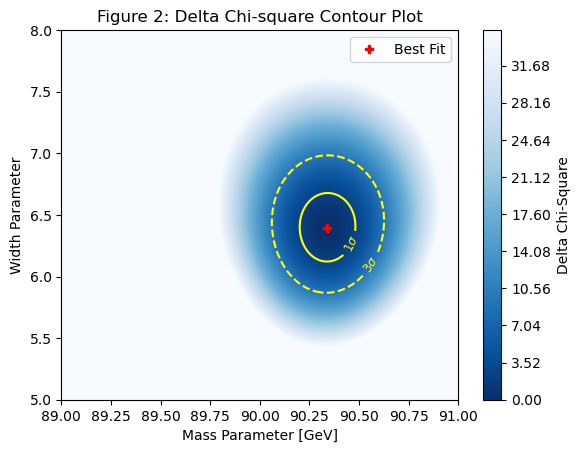

In [9]:
n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
m0_scan = np.linspace(89,91, n_bins)
width_scan = np.linspace(5,8, n_bins)

# preforming a 2D chi-square scan of the mass-width parameter 
#the double for loop
for i in range(n_bins):
    for j in range(n_bins):
        theory = decay_fit(mask_bin_data, m0_scan[i], width_scan[j])
        chi2 = np.sum((theory-mask_counts)**2/mask_sigma**2)
        chi_map[j,i] = chi2

chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min+35) # clip to 35
delta_chi_map = chi_map - chi_min

# making a filled countor plot of the delta chi-squared
X,Y = np.meshgrid(m0_scan,width_scan)
fig2, ax2 = plt.subplots(1,1)
cs = ax2.contourf(X, Y, delta_chi_map, 500, cmap = 'Blues_r')
cbar = fig2.colorbar(cs, ax=ax2)
cbar.set_label('Delta Chi-Square')
ax2.set_xlabel('Mass Parameter [GeV]')
ax2.set_ylabel('Width Parameter')
ax2.set_title('Figure 2: Delta Chi-square Contour Plot')

# drawing the 1-sigma and 3-sigma confidence levels 
fmt = {}
strs = ['1$\\sigma$ = 2.3', '3$\\sigma$ = 9.21']

levels = [2.3, 9.21]
CS = ax2.contour(X, Y, delta_chi_map, levels = levels, colors = ['yellow', 'yellow'], linestyles = ['solid', 'dashed'])
fmt = {}
strs = ['1$\\sigma$', '3$\\sigma$']
for l, s in zip(CS.levels, strs):
    fmt[l] = s

ax2.clabel(CS, CS.levels, fmt=fmt, fontsize = 8.5)
ax2.plot(m0_fit, gamma_fit, 'rP', label = 'Best Fit')
ax2.legend()
fig2.savefig('Figure 2.png')

In [10]:
# comparison to pdg
pdg_m0 = 91.188
pdg_m0_unc = 0.002
difference = pdg_m0 - m0_fit 
unc_difference = np.sqrt(m0_fit_err**2 + pdg_m0_unc**2)
comparison = difference/unc_difference
print(f'difference = {difference} in GeV')
print(f' uncertainty in the difference = {unc_difference} in GeV')
print(f'difference/uncertainty diff = {comparison}')

difference = 0.8471941397909859 in GeV
 uncertainty in the difference = 0.09353621157302651 in GeV
difference/uncertainty diff = 9.057392057508723
